C:\Users\tsuchida\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


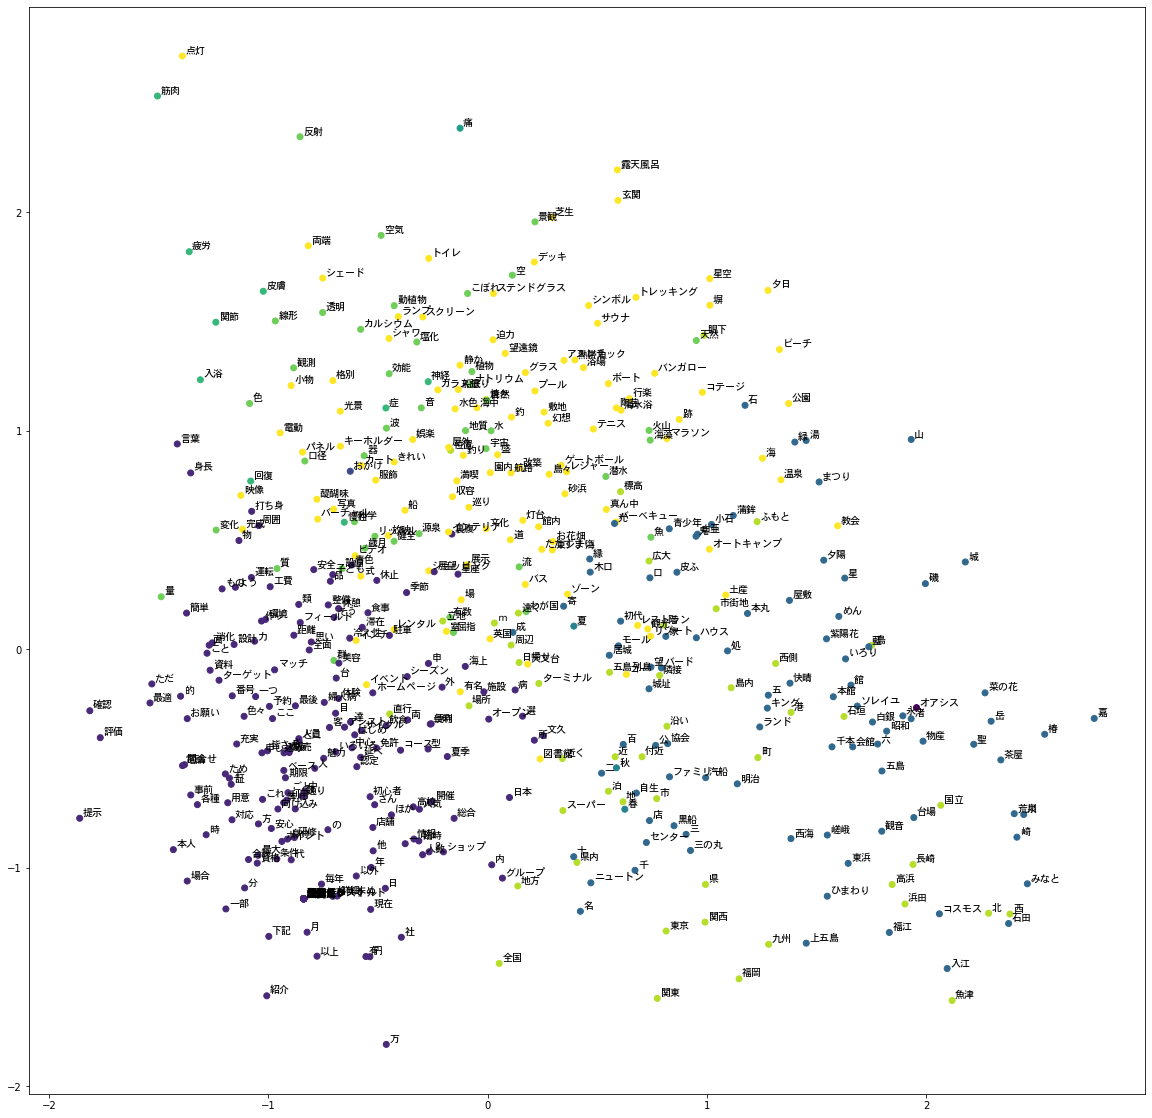

In [3]:
#AI-TECHGYM-1-14-A-2
#自然言語処理

#インポート
import numpy as np
import pandas as pd
import os

os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#主成分分析
from sklearn.decomposition import PCA

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#PCA
pca = PCA(n_components=2)
V = pca.fit_transform(vectors)
df_V = pd.DataFrame(V)

# クラスタリング
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(vectors)
df_V['cluster'] = pd.Series(clusters.labels_, index=df_V.index)

#色指定
color = df_V.cluster.astype(np.float)

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1],c=color)

#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=10)

#グラフ表示
plt.show()


C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


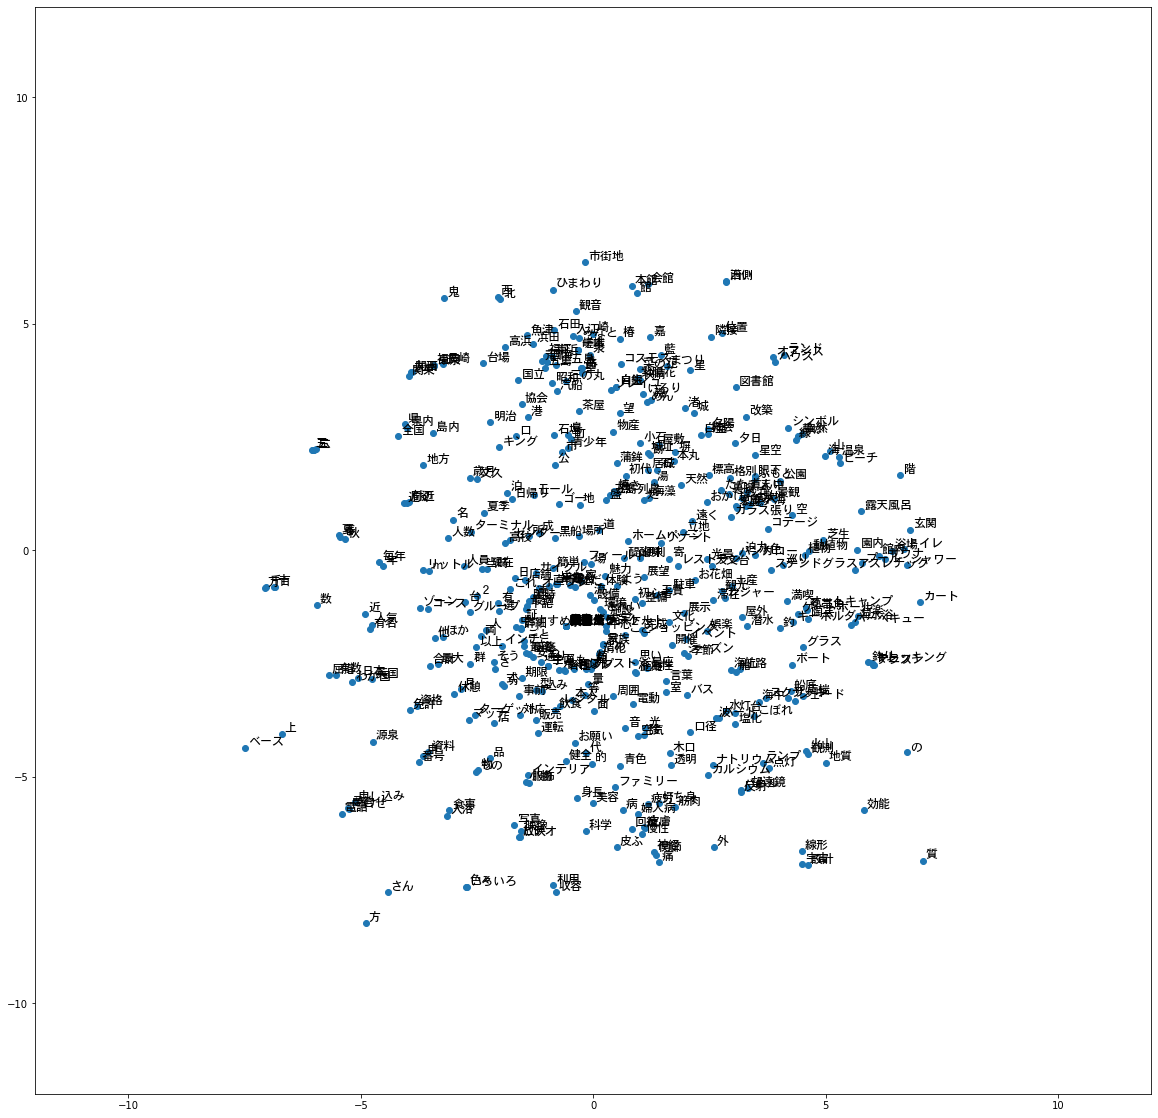

In [6]:
#AI-TECHGYM-1-14-A-3
#自然言語処理

#インポート
import numpy as np
import pandas as pd
import os

os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#次元削減
from sklearn.manifold import TSNE

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#次元削減
tsne = TSNE(n_components=2, random_state=0)
V = tsne.fit_transform(vectors)

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1])

#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=12)

plt.xlim(-12,12)
plt.ylim(-12,12)

#グラフ表示
plt.show()
